In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [129]:
#Top 5 zipcodes for 911 calls
#count each zip codes and group them together

In [17]:
zipDataframe = df['zip'].value_counts()

In [15]:
zipDataframe.nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [18]:
zipDataframe.head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [19]:
twpDataframe = df['twp'].value_counts()
twpDataframe.head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [21]:
#The amount of unique titles
df['title'].nunique()

110

In [15]:
#Create a new column with just the reason from the title using apply()
#All title have a : in it so we can use slicing

def subsetOfTitle(title):
    return title.split(':')[0]

#testing my new function
print(subsetOfTitle('kayan:66'))

kayan


In [16]:
df['Reason'] = df['title'].apply(subsetOfTitle)

In [28]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [35]:
df['Reason'].value_counts().head(3)
#Different ways to see the head of the Reason column

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

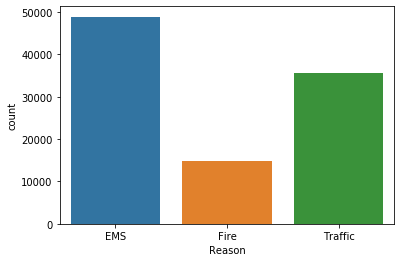

In [36]:
sns.countplot(df['Reason'])
#A plot showing 

In [ ]:
## Let us focus on the time information

In [48]:

print(df['timeStamp'])

object


In [52]:
type(df['timeStamp'].iloc[0])

str

In [6]:
df['Date'] = pd.to_datetime(df['timeStamp'])

In [55]:
time = df['Date'].iloc[0]
month = time.dayofweek
month

3

In [61]:
df['Hour'] = df['Date'].apply(lambda time: time.hour)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)
#Appending each result from lambda to a new column

In [68]:
#Applying a map
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Month,Days,Hour,Reason,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10 17:40:00,12,3,17,EMS,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10 17:40:00,12,3,17,EMS,Thu


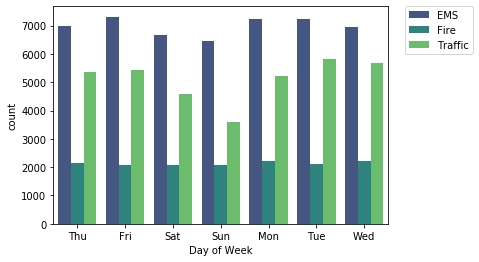

In [47]:
sns.countplot(x='Day of Week', data= df, hue= 'Reason', palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [71]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Month,Hour,Reason,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10 17:40:00,12,17,EMS,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10 17:40:00,12,17,EMS,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015-12-10 17:40:00,12,17,Fire,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10 17:40:01,12,17,EMS,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10 17:40:01,12,17,EMS,Thu


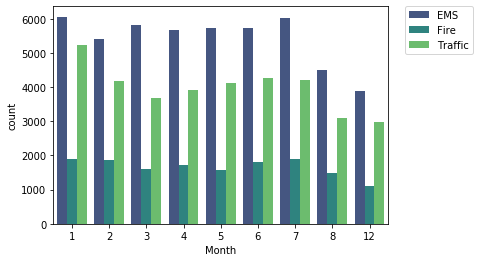

In [72]:
sns.countplot(x='Month', data= df, hue= 'Reason', palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [95]:
byMonth = df.groupby('Month')
byMonth.count().head()

,index,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Hour,Reason,Day of Week
Month,,,,,,,,,,,,,,
1,13205,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


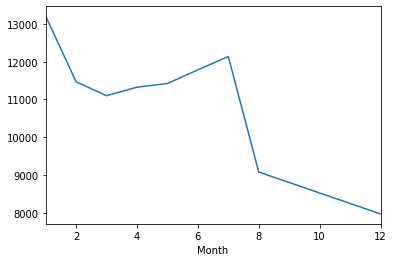

In [83]:
byMonth.count()['title'].plot()

In [100]:
byDate = df.groupby('Date')
byDate.count().head()

,index,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Month,Hour,Reason,Day of Week
Date,,,,,,,,,,,,,,
2015-12-10 17:40:00,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2015-12-10 17:40:01,8,8,8,8,6,8,8,8,8,8,8,8,8,8
2015-12-10 17:40:02,5,5,5,5,4,5,5,5,5,5,5,5,5,5
2015-12-10 17:46:01,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2015-12-10 17:47:01,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [124]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


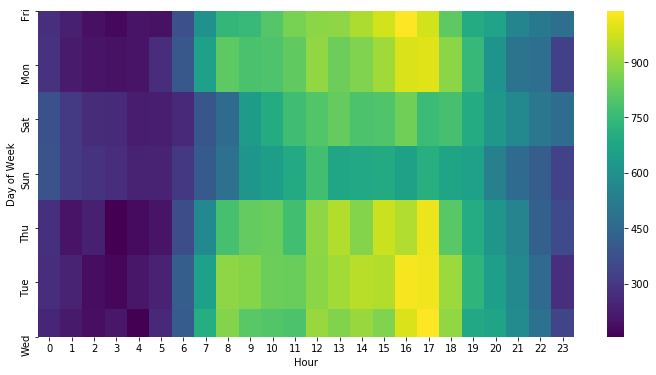

In [127]:
#using a heat map to highlight the times when most 911 calls happen.
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

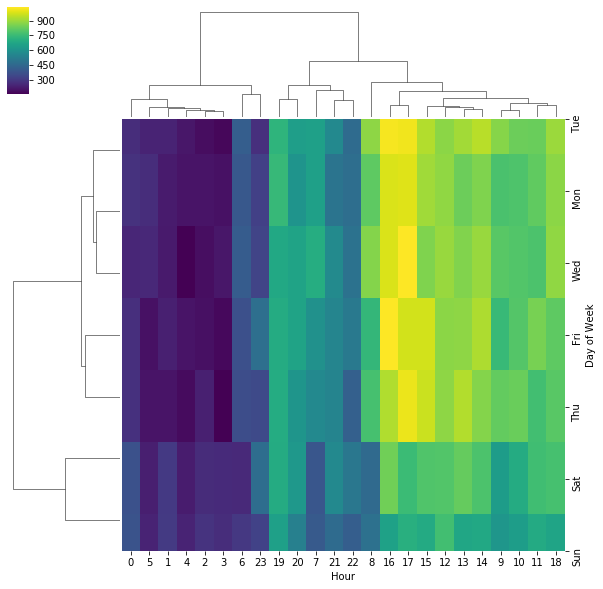

In [128]:
sns.clustermap(dayHour,cmap='viridis')
#grouping/clustering the data that is similaar